Import Library 

In [54]:
import pandas as pd
import numpy as np

Import Data

In [55]:
data = pd.read_csv("50_Startups.csv")
print(data)

    R&D Spend  Administration  Marketing Spend       State     Profit
0   165349.20       136897.80        471784.10    New York  192261.83
1   162597.70       151377.59        443898.53  California  191792.06
2   153441.51       101145.55        407934.54     Florida  191050.39
3   144372.41       118671.85        383199.62    New York  182901.99
4   142107.34        91391.77        366168.42     Florida  166187.94
5   131876.90        99814.71        362861.36    New York  156991.12
6   134615.46       147198.87        127716.82  California  156122.51
7   130298.13       145530.06        323876.68     Florida  155752.60
8   120542.52       148718.95        311613.29    New York  152211.77
9   123334.88       108679.17        304981.62  California  149759.96
10  101913.08       110594.11        229160.95     Florida  146121.95
11  100671.96        91790.61        249744.55  California  144259.40
12   93863.75       127320.38        249839.44     Florida  141585.52
13   91992.39       

Preprocess - Encoding State (One hot encoding)


In [64]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

X = data.iloc[: , :-1].values
y = data.iloc[: , -1].values
transformer = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')
X = np.array(transformer.fit_transform(X))
print(X)

print(y.shape)


[[0.0 0.0 1.0 165349.2 136897.8 471784.1]
 [1.0 0.0 0.0 162597.7 151377.59 443898.53]
 [0.0 1.0 0.0 153441.51 101145.55 407934.54]
 [0.0 0.0 1.0 144372.41 118671.85 383199.62]
 [0.0 1.0 0.0 142107.34 91391.77 366168.42]
 [0.0 0.0 1.0 131876.9 99814.71 362861.36]
 [1.0 0.0 0.0 134615.46 147198.87 127716.82]
 [0.0 1.0 0.0 130298.13 145530.06 323876.68]
 [0.0 0.0 1.0 120542.52 148718.95 311613.29]
 [1.0 0.0 0.0 123334.88 108679.17 304981.62]
 [0.0 1.0 0.0 101913.08 110594.11 229160.95]
 [1.0 0.0 0.0 100671.96 91790.61 249744.55]
 [0.0 1.0 0.0 93863.75 127320.38 249839.44]
 [1.0 0.0 0.0 91992.39 135495.07 252664.93]
 [0.0 1.0 0.0 119943.24 156547.42 256512.92]
 [0.0 0.0 1.0 114523.61 122616.84 261776.23]
 [1.0 0.0 0.0 78013.11 121597.55 264346.06]
 [0.0 0.0 1.0 94657.16 145077.58 282574.31]
 [0.0 1.0 0.0 91749.16 114175.79 294919.57]
 [0.0 0.0 1.0 86419.7 153514.11 0.0]
 [1.0 0.0 0.0 76253.86 113867.3 298664.47]
 [0.0 0.0 1.0 78389.47 153773.43 299737.29]
 [0.0 1.0 0.0 73994.56 122782.75 3

Reshape for sclaing

In [65]:
y = y.reshape(len(y),1)
print(y)

[[192261.83]
 [191792.06]
 [191050.39]
 [182901.99]
 [166187.94]
 [156991.12]
 [156122.51]
 [155752.6 ]
 [152211.77]
 [149759.96]
 [146121.95]
 [144259.4 ]
 [141585.52]
 [134307.35]
 [132602.65]
 [129917.04]
 [126992.93]
 [125370.37]
 [124266.9 ]
 [122776.86]
 [118474.03]
 [111313.02]
 [110352.25]
 [108733.99]
 [108552.04]
 [107404.34]
 [105733.54]
 [105008.31]
 [103282.38]
 [101004.64]
 [ 99937.59]
 [ 97483.56]
 [ 97427.84]
 [ 96778.92]
 [ 96712.8 ]
 [ 96479.51]
 [ 90708.19]
 [ 89949.14]
 [ 81229.06]
 [ 81005.76]
 [ 78239.91]
 [ 77798.83]
 [ 71498.49]
 [ 69758.98]
 [ 65200.33]
 [ 64926.08]
 [ 49490.75]
 [ 42559.73]
 [ 35673.41]
 [ 14681.4 ]]


Preprocess - Scale The Variables

In [66]:
from sklearn.preprocessing import StandardScaler , MinMaxScaler
# sc_X = StandardScaler()
# sc_y = StandardScaler() - works with standard scaler also 

sc_X = MinMaxScaler()
sc_y = MinMaxScaler()

X[:,3:] = sc_X.fit_transform(X[:,3:])
y = sc_y.fit_transform(y)

print(X[:3,:])
y= y.reshape(len(y))

[[0.0 0.0 1.0 1.0 0.6517439310268491 1.0]
 [1.0 0.0 0.0 0.9833594598582879 0.7619717267693455 0.9408933662664767]
 [0.0 1.0 0.0 0.927984592607645 0.3795789541636034 0.864663603542383]]


Feature Visulaization

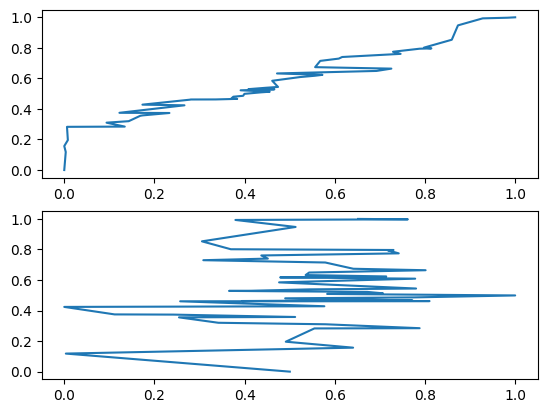

In [82]:
import  matplotlib.pyplot as plt

fig , ax = plt.subplots(2)

ax[0].plot(X[:,3] , y)
# plt.title("R&D Spend")
# plt.subplot(2,1,1)

ax[1].plot(X[:,4] , y)
# plt.title("Adminstation")
# plt.subplot(2,1,2)
plt.show()


In [67]:
print(y.shape)
print(y)

(50,)
[1.   1.   0.99 0.95 0.85 0.8  0.8  0.79 0.77 0.76 0.74 0.73 0.71 0.67
 0.66 0.65 0.63 0.62 0.62 0.61 0.58 0.54 0.54 0.53 0.53 0.52 0.51 0.51
 0.5  0.49 0.48 0.47 0.47 0.46 0.46 0.46 0.43 0.42 0.37 0.37 0.36 0.36
 0.32 0.31 0.28 0.28 0.2  0.16 0.12 0.  ]


Split the Data

In [68]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test  = train_test_split(X , y , test_size=0.2 , random_state=0)

Fit the model

In [69]:
from sklearn.linear_model  import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

Predict using model

In [70]:
y_pred= lr.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

from sklearn.metrics import mean_absolute_error , mean_squared_error , r2_score

print("MSE=",mean_squared_error(y_true = y_test ,y_pred= y_pred))
print("MAE=",mean_squared_error(y_true = y_test ,y_pred= y_pred))
print("R2 Score=",r2_score(y_true = y_test ,y_pred= y_pred))

[[0.5  0.5 ]
 [0.66 0.73]
 [0.66 0.74]
 [0.32 0.36]
 [0.92 0.99]
 [0.57 0.51]
 [0.3  0.37]
 [0.47 0.47]
 [0.56 0.54]
 [0.86 0.85]]
MSE= 0.002647958442288657
MAE= 0.002647958442288657
R2 Score= 0.9347068473282425
